In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load the dataset
url = "https://raw.githubusercontent.com/selva86/datasets/master/Advertising.csv"
df_advertising = pd.read_csv(url)

print(df_advertising.head())

   Unnamed: 0     TV  radio  newspaper  sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


In [26]:
clean_df_advertising = df_advertising.iloc[:, 1:]
X = clean_df_advertising.drop(columns=['sales'])
y = clean_df_advertising['sales']

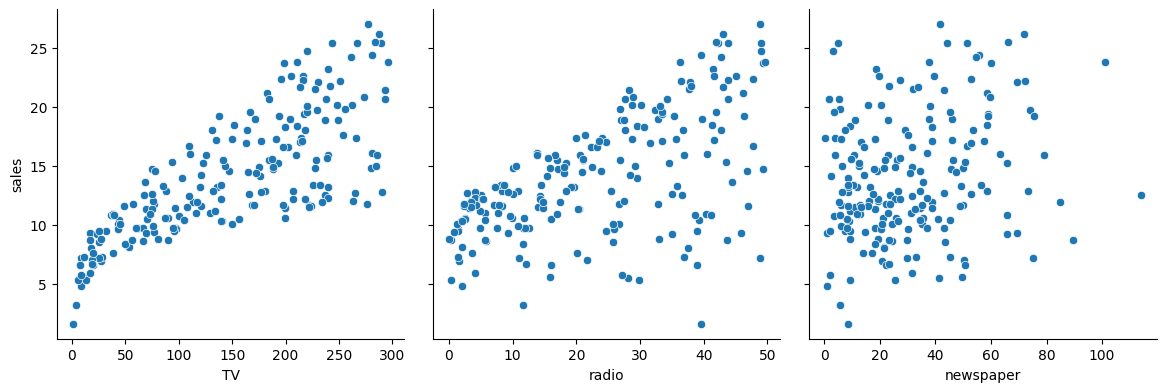

In [32]:
import seaborn as sns

g = sns.PairGrid(df_advertising, x_vars=['TV', 'radio', 'newspaper'], y_vars=['sales'], height=4)
g.map(sns.scatterplot)

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[ 9.69852266e-01,  9.81522472e-01,  1.77894547e+00],
       [-1.19737623e+00,  1.08280781e+00,  6.69578760e-01],
       [-1.51615499e+00,  1.52846331e+00,  1.78354865e+00],
       [ 5.20496822e-02,  1.21785493e+00,  1.28640506e+00],
       [ 3.94182198e-01, -8.41613655e-01,  1.28180188e+00],
       [-1.61540845e+00,  1.73103399e+00,  2.04592999e+00],
       [-1.04557682e+00,  6.43904671e-01, -3.24708413e-01],
       [-3.13436589e-01, -2.47406325e-01, -8.72486994e-01],
       [-1.61657614e+00, -1.42906863e+00, -1.36042422e+00],
       [ 6.16042873e-01, -1.39530685e+00, -4.30581584e-01],
       [-9.45155670e-01, -1.17923146e+00, -2.92486143e-01],
       [ 7.90028350e-01,  4.96973404e-02, -1.22232878e+00],
       [-1.43908760e+00,  7.99208859e-01,  1.62704048e+00],
       [-5.78501712e-01, -1.05768905e+00, -1.07502697e+00],
       [ 6.66253447e-01,  6.50657027e-01,  7.11007392e-01],
       [ 5.64664612e-01,  1.65000572e+00,  1.02862691e+00],
       [-9.25304978e-01,  9.00494200e-01

In [41]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [42]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train)

LinearRegression()

In [43]:
y_pred = linear_reg.predict(x_test)

In [48]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(r2)

0.8353672324670594


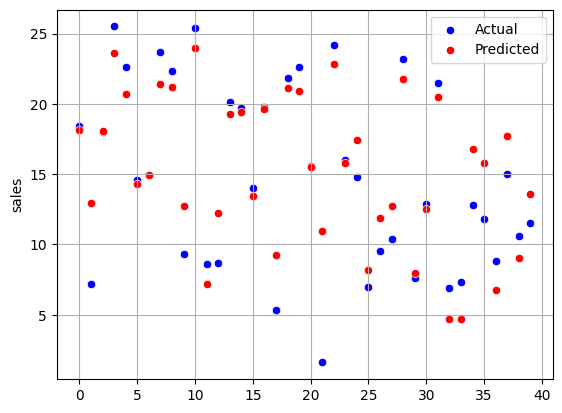

In [56]:
sns.scatterplot(x=range(len(y_test)), y=y_test, color='blue', label='Actual')
sns.scatterplot(x=range(len(y_pred)), y=y_pred, color='red', label='Predicted')
plt.legend()
plt.grid()
plt.show()